In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.stats import binom

In [2]:
# load data
X = np.genfromtxt('X.csv', delimiter = ',')
N = X.shape[0]

Problem #1, EM

In [24]:
def E_step(X, pi, theta, N):
     bi = binom.pmf(k = X, n = 20, p = theta)
     bi = bi.T
     pi_bi = bi@pi
     pi_bi = pi_bi.reshape(N,1)
     phi_top = pi.T * bi
     phi = phi_top / pi_bi
     return phi

In [22]:
def M_step(phi, X, N, K):
    n_t = np.sum(phi, 0, dtype ='float')
    pi = n_t/N
    theta = X.T @phi / (20*n_t)
    theta = theta.reshape(K,1)
    return pi, theta

In [38]:
def EM_likelihood(X, phi, theta, pi, N):
    log_theta = np.log(theta)
    phi_theta = (phi@log_theta).reshape(N,1)
    pt1 = phi_theta.T @ X 
    pt1 = pt1[0]
    
    log_1minus_theta = np.log(1-theta)
    phi_1minus_theta = (phi@log_1minus_theta).reshape(N,1)
    pt2 = phi_1minus_theta.T @ (20-X)
    pt2 = pt2[0]
    
    log_pi = np.log(pi)
    phi_pi = (phi@pi).reshape(N,1)
    pt3 = np.sum(phi_pi)

    return pt1+pt2+pt3

In [67]:
def EM(X, t=50, K=3):
    # initialization
    N = X.shape[0]
    pi = np.zeros((K,1), dtype = 'float') + 1/K
    theta = np.array([0.01 * (i+1) for i in range(K)]).reshape((K,1))
    phi = np.zeros((N,K), dtype = 'float') + 10**(-5)
    likelihood = []
    # iterations
    for i in range(t):
        phi = E_step(X, pi, theta, N)
        pi, theta = M_step(phi, X, N, K)
        result = EM_likelihood(X, phi, theta, pi, N)
        likelihood.append(result)
    return likelihood, phi

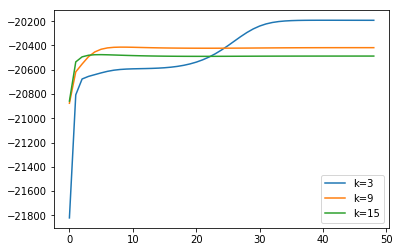

In [70]:
K = [3,9,15]

for k in K:
    L,phi = EM(X, K = k)
    plt.plot(L[1:],label="k=%d"%(k,))
plt.legend(loc='best')
plt.show()

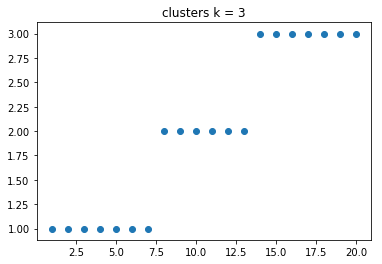

In [57]:
k = 3
L1, phi1 = EM(X, K = k)
plot1 = [[0 for i in range(k)] for i in range(21)]
for j in range(1,21):
    for i in range(N):
        if int(X[i]) ==j:
            plot1[j][np.argmax(phi1[i,:])] += 1
#remove the first row
plot11 = plot1[1:]
for i in range(len(plot11)):
    plot11[i]= np.argmax(plot11[i]) +1
#plot
plt.scatter(range(1,21),plot11)
plt.title("clusters k = 3")
plt.show()

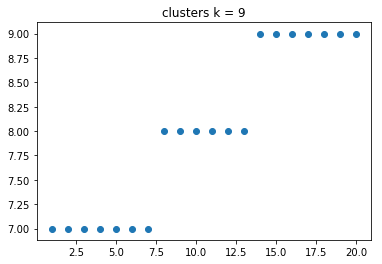

In [68]:
k = 9
L2, phi2 = EM(X, K = k)
plot2 = [[0 for i in range(k)] for i in range(21)]
for j in range(1,21):
    for i in range(N):
        if int(X[i]) ==j:
            plot2[j][np.argmax(phi2[i,:])] += 1
#remove the first row
plot22 = plot2[1:]
for i in range(len(plot22)):
    plot22[i]= np.argmax(plot22[i]) +1 
#plot
plt.scatter(range(1,21),plot22)
plt.title("clusters k = 9")
plt.show()

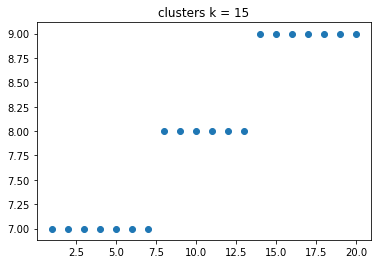

In [69]:
k = 15
L3, phi3 = EM(X, K = k)
plot3 = [[0 for i in range(k)] for i in range(21)]
for j in range(1,21):
    for i in range(N):
        if int(X[i]) ==j:
            plot3[j][np.argmax(phi3[i,:])] += 1
#remove the first row
plot33 = plot3[1:]
for i in range(len(plot33)):
    plot33[i]= np.argmax(plot33[i]) +1 
#plot
plt.scatter(range(1,21),plot22)
plt.title("clusters k = 15")
plt.show()